In [4]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
#function to draw rugby pitch
#by default saves image as rugby_pitch.png, but allows user to pass filepath/name to save image
#allows you to set pitch colour, line colour for solid and dashed lines, line thickness, and orientation
#allows you to disable the dashed lines and goal posts [dashes = False, posts = False]
#provides the option to only draw half the pitch [aspect  = full or half]

#adapted from Peter Mckeever - "How to draw a football pitch"
#http://petermckeever.com/2020/10/how-to-draw-a-football-pitch/


def draw_rugby(filepath = "rugby_pitch",
               fig_size = [11,7],
               pitch_colour = "green",
               dashes = True, posts = True,
               line_colour_main = "white",
               line_colour_dash = "lightgrey",
               line_thickness = 1.5, 
               orientation = "horizontal", 
               aspect = "full"):
    
    fig, ax = plt.subplots(figsize=fig_size)
    
    x_min = 0
    x_max = 100

    y_min = 0
    y_max = 70

    in_goal = 20
    
    

    if orientation.lower().startswith("h"):
        horizontal = True
        
        if aspect == "half":
            ax.set_xlim(x_max / 2 - 5, x_max + in_goal + 5)

    elif orientation.lower().startswith("v"):
        horizontal = False

        if aspect == "half":
            ax.set_ylim(x_max / 2 - 5, x_max + in_goal + 5)

    
    else:
        raise NameError("You must enter an orientation, either horizontal or vertical")

    
    ax.axis("off")
    
    
    if horizontal:
        rect = plt.Rectangle((x_min-in_goal - 5, y_min - 5),
                             x_max+2*in_goal + 10, y_max + 10,
                             facecolor=pitch_colour,
                             edgecolor="none",
                             zorder=-2)
    else:
        rect = plt.Rectangle((y_min - 5, x_min-in_goal - 5),
                             y_max + 10, x_max+2*in_goal + 10,
                             facecolor=pitch_colour,
                             edgecolor="none",
                             zorder=-2)

    ax.add_artist(rect)



    # touch and goal lines
    tgx = [x_min, x_max, x_max, x_min, x_min]
    tgy = [y_min, y_min, y_max, y_max, y_min]

    #touch-in-goal and dead-ball line
    tdx1 = [x_max, x_max+in_goal, x_max+in_goal, x_max]
    tdy1 = [y_min, y_min, y_max, y_max]

    tdx2 = [x_min, x_min-in_goal, x_min-in_goal, x_min]
    tdy2 = [y_min, y_min, y_max, y_max]


    #half-way line and center
    hfx = [x_max/2, x_max/2]
    hfy = [y_min, y_max]

    hfcx = [x_max/2-0.25, x_max/2+0.25]
    hfcy = [y_max/2, y_max/2]

    #22-metre lines
    ttx1 = [22, 22]
    tty1 = [y_min, y_max]

    ttx2 = [x_max-22, x_max-22]
    tty2 = [y_min, y_max]



    lines = [
        [tgx,tgy],
        [tdx1,tdy1],
        [tdx2,tdy2],
        [hfx,hfy],
        [hfcx,hfcy],
        [ttx1,tty1],
        [ttx2,tty2]
    ]

    for line in lines:
        if horizontal == True:
            ax.plot(line[0], line[1],
                    color=line_colour_main,
                    lw=line_thickness,
                    zorder=-1)
        else:
            ax.plot(line[1], line[0],
                    color=line_colour_main,
                    lw=line_thickness,
                    zorder=-1)

            
    if dashes:

        #vertical 10m lines    
        for x in [40, 60]:
            for y in range(25, 700, 100):
                if horizontal == True:
                    ax.plot([x, x], [y/10, y/10+5],
                            color=line_colour_dash,
                            lw=line_thickness,
                            zorder=-1)
                else:
                    ax.plot([y/10, y/10+5], [x,x],
                            color=line_colour_dash,
                            lw=line_thickness,
                            zorder=-1)

        #vertical 5m lines
        for x in [5, 95]:
            for y in [2.5, 12.5, 27.5, 37.5, 52.5, 62.5]:
                if horizontal == True:
                    ax.plot([x, x], [y, y+5],
                            color=line_colour_dash,
                            lw=line_thickness,
                            zorder=-1)
                else:
                    ax.plot([y, y+5], [x, x],
                            color=line_colour_dash,
                            lw=line_thickness,
                            zorder=-1)


        #horizontal dashed lines
        for y in [5, 15, 55, 65]:
            for x in [5, 19.5, 37.5, 47.5, 57.5, 75.5, 90]:
                if horizontal == True:
                    ax.plot([x, x+5], [y, y],
                            color=line_colour_dash,
                            lw=line_thickness,
                            zorder=-1)
                else:
                    ax.plot([y,y], [x, x+5],
                            color=line_colour_dash,
                            lw=line_thickness,
                            zorder=-1)

                    
    if posts:                
                    
        #goal posts            
        for y in [32.2, 37.8]: 
            for x in [-15, 100]:
                if horizontal == True:
                    ax.plot([x, x+15], [y, y],
                            color=line_colour_main,
                            lw=line_thickness,
                            zorder=-1)
                else:
                    ax.plot([y,y], [x, x+15],
                            color=line_colour_main,
                            lw=line_thickness,
                            zorder=-1)   

        #goal post crossbars
        if horizontal == True:
            ax.plot([-5, -5], [32.2,37.8],
                            color=line_colour_main,
                            lw=line_thickness,
                            zorder=-1)
            ax.plot([105, 105], [32.2,37.8],
                            color=line_colour_main,
                            lw=line_thickness,
                            zorder=-1)
        else:
            ax.plot([32.2,37.8], [-5,-5],
                            color=line_colour_main,
                            lw=line_thickness,
                            zorder=-1)
            ax.plot([32.2,37.8], [105,105],
                            color=line_colour_main,
                            lw=line_thickness,
                            zorder=-1) 



    ax.set_aspect("equal")
    fig.savefig(filepath + ".png")
    return

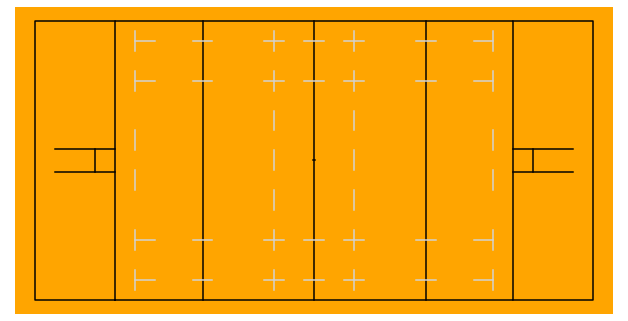

In [6]:
draw_rugby(filepath = "spooky_rugby",
           orientation="h",
           aspect="full",
           line_colour_main = "black",
           line_colour_dash = "lightgrey",
           pitch_colour = "orange")
